In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Drop the specified columns
columns_to_drop = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
dataset = dataset.drop(columns=columns_to_drop)

# Create a new column 'FamilySize' by adding 'SibSp' and 'Parch'
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
dataset = dataset.drop(columns=['SibSp', 'Parch'])

# Define the bins for age ranges
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize,AgeGroup
0,1,0,3,male,22.0,1,20-30
1,2,1,1,female,38.0,1,30-40
2,3,1,3,female,26.0,0,20-30
3,4,1,1,female,35.0,1,30-40
4,5,0,3,male,35.0,0,30-40


In [8]:
dataset_cleaned = dataset.dropna()
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=['Sex', 'AgeGroup'])

dataset_encoded.head()

,PassengerId,Survived,Pclass,Age,FamilySize,Sex_female,Sex_male,AgeGroup_0-10,AgeGroup_10-20,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70-80,AgeGroup_80-90
0,1,0,3,22.0,1,0,1,0,0,1,0,0,0,0,0,0
1,2,1,1,38.0,1,1,0,0,0,0,1,0,0,0,0,0
2,3,1,3,26.0,0,1,0,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,1,1,0,0,0,0,1,0,0,0,0,0
4,5,0,3,35.0,0,0,1,0,0,0,1,0,0,0,0,0


In [9]:
X, y = (dataset_encoded.drop(columns=['Survived']), dataset_encoded['Survived'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
names = [
    ["Logistic Regression", "Statistik"],
    ["Naive Bayes", "Statistik"],
    ["KNN", "Geometri"],
    ["Linear SVM", "Geometri"],
    ["SVM RBF kernel", "Geometri"],
    ["MLP 1 hidden layer", "Neurosains"],
    ["MLP 2 hidden layer", "Neurosains"],
    ["Decision Tree", "Logika"],
    ["Random Forest", "Sosial"],
    ["Gradient Boosting", "Sosial"],
]

classifiers = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), alpha=1, max_iter=1000, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100, 100), alpha=1, max_iter=1000, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
]

In [11]:
# figure = plt.figure(figsize=(27, 9))
# n_classifiers = len(classifiers)

# # Plotting
# for i, clf in enumerate(classifiers):
#     ax = plt.subplot(1, n_classifiers, i + 1)
#     clf = make_pipeline(StandardScaler(), clf)
    
#     # Track scores for each fold
#     scores = []
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
#         # Fit the classifier and calculate accuracy
#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)
#         score = accuracy_score(y_test, y_pred)
#         scores.append(score)
    
#     # Calculate average score across folds
#     avg_score = np.mean(scores)
    
#     # Scatter plot
#     # ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k", label="Training data")
#     ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, alpha=0.6, edgecolors="k")
#     ax.set_xlim(X.values[:, 0].min() - 0.5, X.values[:, 0].max() + 0.5)
#     ax.set_ylim(X.values[:, 1].min() - 0.5, X.values[:, 1].max() + 0.5)
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(names[i])
#     ax.text(X.values[:, 0].max() - 0.3, X.values[:, 1].min() + 0.3, f"Accuracy: {avg_score:.3f}", size=15, horizontalalignment="right")
#     ax.legend(loc='lower right')

# plt.tight_layout()
# plt.show()


In [17]:
result_model = {
    "Name": [],
    "Paradigm": [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

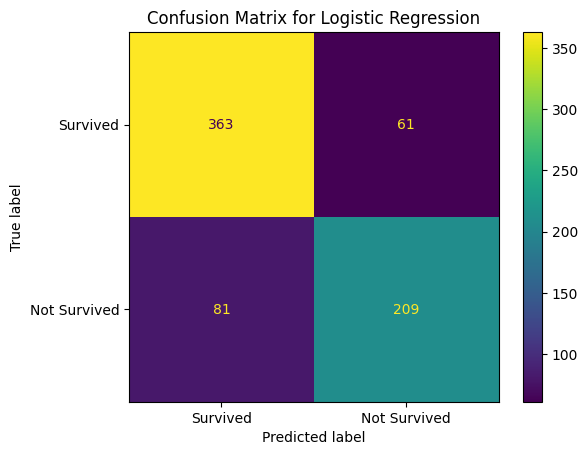

Average Accuracy Logistic Regression: 0.801
Average Precision Logistic Regression: 0.776
Average Recall Logistic Regression: 0.725
Average F1 Score Logistic Regression: 0.747


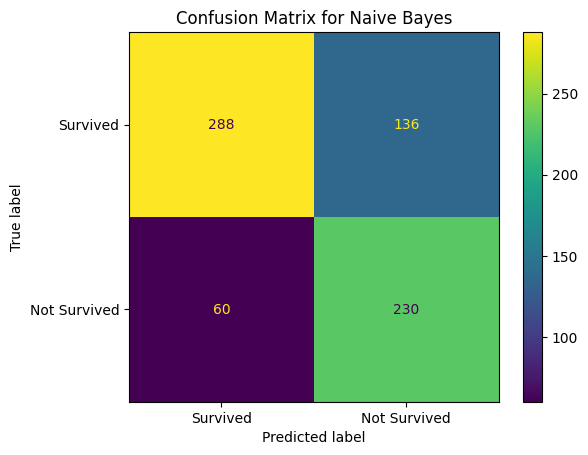

Average Accuracy Naive Bayes: 0.725
Average Precision Naive Bayes: 0.690
Average Recall Naive Bayes: 0.794
Average F1 Score Naive Bayes: 0.718


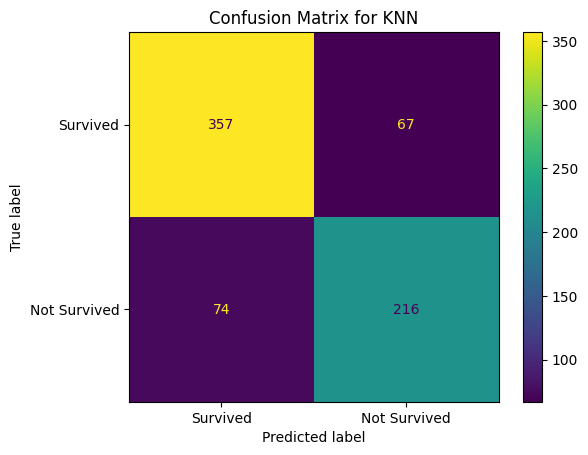

Average Accuracy KNN: 0.803
Average Precision KNN: 0.767
Average Recall KNN: 0.748
Average F1 Score KNN: 0.755


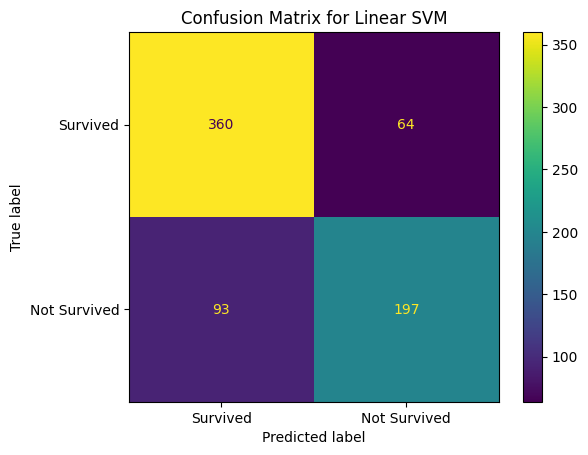

Average Accuracy Linear SVM: 0.780
Average Precision Linear SVM: 0.755
Average Recall Linear SVM: 0.681
Average F1 Score Linear SVM: 0.716


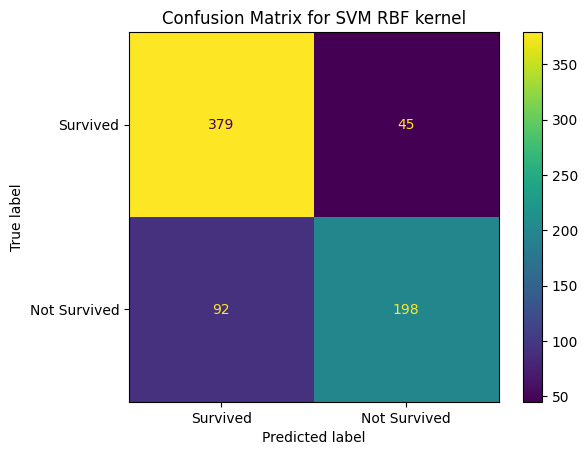

Average Accuracy SVM RBF kernel: 0.808
Average Precision SVM RBF kernel: 0.818
Average Recall SVM RBF kernel: 0.687
Average F1 Score SVM RBF kernel: 0.744


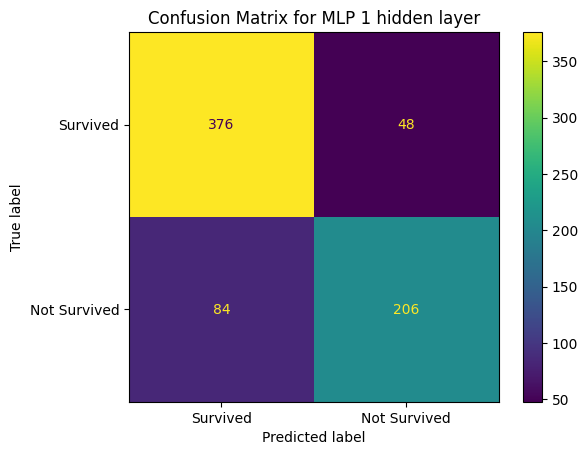

Average Accuracy MLP 1 hidden layer: 0.815
Average Precision MLP 1 hidden layer: 0.815
Average Recall MLP 1 hidden layer: 0.714
Average F1 Score MLP 1 hidden layer: 0.758


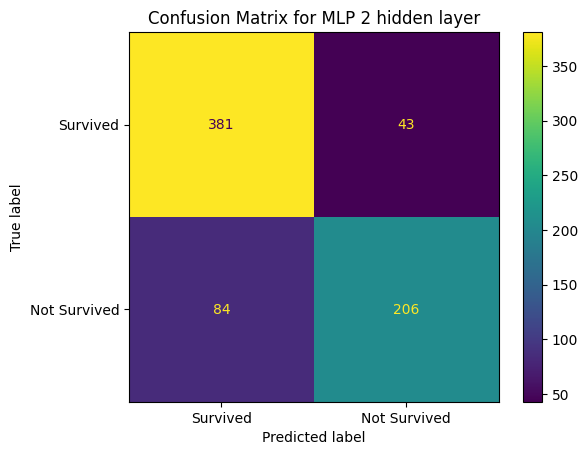

Average Accuracy MLP 2 hidden layer: 0.822
Average Precision MLP 2 hidden layer: 0.830
Average Recall MLP 2 hidden layer: 0.715
Average F1 Score MLP 2 hidden layer: 0.765


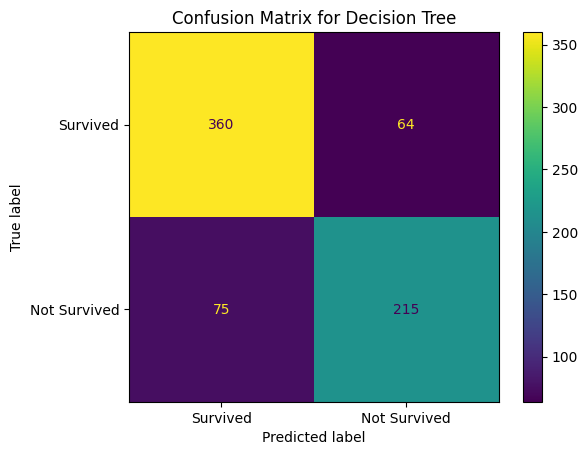

Average Accuracy Decision Tree: 0.805
Average Precision Decision Tree: 0.774
Average Recall Decision Tree: 0.747
Average F1 Score Decision Tree: 0.756


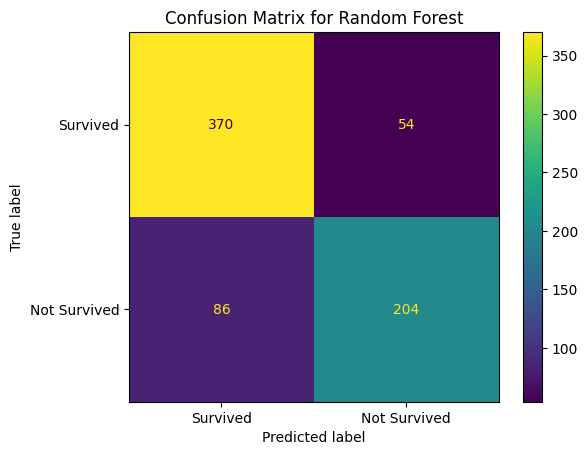

Average Accuracy Random Forest: 0.804
Average Precision Random Forest: 0.792
Average Recall Random Forest: 0.706
Average F1 Score Random Forest: 0.745


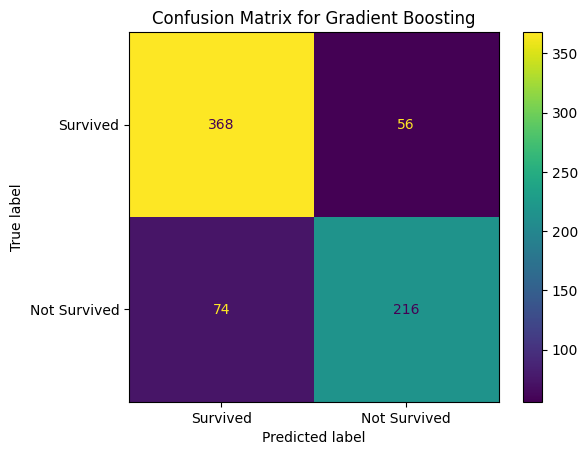

Average Accuracy Gradient Boosting: 0.818
Average Precision Gradient Boosting: 0.797
Average Recall Gradient Boosting: 0.750
Average F1 Score Gradient Boosting: 0.769


In [18]:
# Plotting
for i, clf in enumerate(classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    
    # Track scores for each fold
    scores = []
    precisions = []
    recalls = []
    f1_scores = []
    all_true = []
    all_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the classifier and calculate metrics
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        
        precision = precision_score(y_test, y_pred)
        precisions.append(precision)
        
        recall = recall_score(y_test, y_pred)
        recalls.append(recall)
        
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
        
        all_true.extend(y_test)
        all_pred.extend(y_pred)
    
    # Calculate average scores across folds
    avg_score = np.mean(scores)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    
    # Save result into dict
    result_model['Name'].append(names[i][0])
    result_model['Paradigm'].append(names[i][1])
    result_model['Accuracy'].append(avg_score)
    result_model['Precision'].append(avg_precision)
    result_model['Recall'].append(avg_recall)
    result_model['F1-score'].append(avg_f1)

    # Plot confusion matrix
    cm = confusion_matrix(all_true, all_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not Survived'])
    disp.plot()
    title = "Confusion Matrix" if names[i][0] == "" else "Confusion Matrix for " + names[i][0]
    plt.title(title)
    plt.show()

    print(f"Average Accuracy {names[i][0]}: {avg_score:.3f}")
    print(f"Average Precision {names[i][0]}: {avg_precision:.3f}")
    print(f"Average Recall {names[i][0]}: {avg_recall:.3f}")
    print(f"Average F1 Score {names[i][0]}: {avg_f1:.3f}")


In [19]:
comparison_df = pd.DataFrame(result_model)
comparison_df

,Name,Paradigm,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,Statistik,0.801133,0.775855,0.725453,0.747343
1,Naive Bayes,Statistik,0.725086,0.689766,0.794279,0.718228
2,KNN,Geometri,0.802531,0.767054,0.747851,0.755300
3,Linear SVM,Geometri,0.780095,0.755380,0.681256,0.715573
4,SVM RBF kernel,Geometri,0.808126,0.818399,0.687062,0.744033
5,MLP 1 hidden layer,Neurosains,0.815099,0.814695,0.713929,0.757786
6,MLP 2 hidden layer,Neurosains,0.822131,0.829857,0.715305,0.765219
7,Decision Tree,Logika,0.805319,0.774367,0.746698,0.756017
8,Random Forest,Sosial,0.803920,0.792067,0.706274,0.745100
9,Gradient Boosting,Sosial,0.817936,0.796803,0.749630,0.769195


## Kesimpulan

Berdasarkan metrik kinerja, MLP dengan 2 lapisan tersembunyi menunjukkan akurasi rata-rata tertinggi (0,822) dan presisi (0,830), memperlihatkan keahliannya dalam mengklasifikasi dengan tepat dan meminimalkan False Positive. Sementara itu, Naive Bayes menunjukkan recall rata-rata tertinggi (0,794), menandakan sensitifitas dalam mengidentifikasi kasus positif dengan benar dari dataset. Namun, Gradient Boosting menonjol dengan skor F1 rata-rata tertinggi (0,769), menyoroti efektivitasnya dalam mencapai keseimbangan antara presisi dan recall. Oleh karena itu, ketika memilih klasifikasi untuk dataset ini, MLP dengan 2 lapisan tersembunyi akan lebih disukai untuk tugas yang sensitif terhadap presisi, Naive Bayes untuk memaksimalkan recall, dan Gradient Boosting untuk mencapai keseimbangan antara presisi dan recall. Untuk model yang bertipe geometri dan logika kurang unggul dalam hal klasifikasi survival Titanic berdasarkan empat metrik di atas.